In [1]:
import pandas as pd
from geopy.distance import geodesic
from shapely.wkt import loads

sp = pd.read_csv('staypoints.csv', index_col=0)
sp

user_id                 started_at                finished_at  \
id                                                                      
0             0  2022-10-10 18:41:33-04:00  2022-10-10 18:54:04-04:00   
1             2  2022-09-05 22:47:52-04:00  2022-09-06 00:31:06-04:00   
2             2  2022-09-06 00:31:06-04:00  2022-09-06 03:00:04-04:00   
3             2  2022-09-06 03:00:04-04:00  2022-09-06 09:15:08-04:00   
4             2  2022-09-06 09:15:08-04:00  2022-09-06 09:53:50-04:00   
...         ...                        ...                        ...   
639217    34490  2022-10-23 11:48:56-04:00  2022-10-24 04:50:56-04:00   
639218    34490  2022-10-24 04:50:56-04:00  2022-10-24 10:30:54-04:00   
639219    34492  2022-10-28 13:34:46-04:00  2022-10-28 15:25:22-04:00   
639220    34492  2022-10-28 15:25:22-04:00  2022-10-28 21:56:11-04:00   
639221    34497  2022-10-26 05:41:13-04:00  2022-10-26 08:25:34-04:00   

                                                    geom  
id                                                        
0       POINT (-81.6625549999999976 30.4599150000000023)  
1       POINT (-81.6578598100000050 29.6550407400000005)  
2       POINT (-81.6775345799999997 29.6550393099999994)  
3       POINT (-81.6840799999999945 29.6517529999999994)  
4       POINT (-81.6775222899999989 29.6550346550000015)  
...                                                  ...  
639217  POINT (-81.5628399999999942 30.2972900000000003)  
639218  POINT (-81.5595699999999937 30.2972900000000003)  
639219  POINT (-81.4805894999999936 29.9887441000000017)  
639220  POINT (-81.3433906000000064 29.8641523999999983)  
639221  POINT (-82.2478899999999982 29.4090600000000002)  

[639222 rows x 4 columns]

In [2]:
def within_distance(pt1, pt2):
    return geodesic(pt1, pt2).meters <= 100

In [3]:
len(sp)

639222

In [14]:
from tqdm import tqdm

user_positions = {}
for i, row in tqdm(sp.iterrows(), total=len(sp)):
    user_id = row['user_id']
    p = loads(row[3])
    lon = p.x
    lat = p.y
    position = (lat, lon)
    if user_id not in user_positions:
        user_positions[user_id] = [position]
    else:
        is_duplicate = False
        for p in user_positions[user_id]:
            if within_distance(p, position):
                is_duplicate = True
                break
        if not is_duplicate:
            user_positions[user_id].append(position)


100%|██████████| 432640/432640 [26:32<00:00, 271.74it/s] 


In [15]:
for user_id, positions in user_positions.items():
    print(f"User {user_id} has {len(positions)} different positions.")


User 0 has 1 different positions.
User 2 has 5 different positions.
User 3 has 2 different positions.
User 8 has 48 different positions.
User 10 has 20 different positions.
User 11 has 4 different positions.
User 14 has 4 different positions.
User 16 has 5 different positions.
User 22 has 181 different positions.
User 29 has 1 different positions.
User 30 has 38 different positions.
User 32 has 5 different positions.
User 39 has 1 different positions.
User 40 has 2 different positions.
User 41 has 1 different positions.
User 46 has 4 different positions.
User 50 has 74 different positions.
User 51 has 2 different positions.
User 52 has 29 different positions.
User 54 has 6 different positions.
User 56 has 1 different positions.
User 58 has 19 different positions.
User 60 has 2 different positions.
User 68 has 1 different positions.
User 72 has 4 different positions.
User 74 has 23 different positions.
User 76 has 16 different positions.
User 78 has 14 different positions.
User 82 has 1

In [16]:
result_df = pd.DataFrame(columns=["user_id", "num_positions"])
for user_id, positions in user_positions.items():
    num_positions = len(positions)
    result_df = result_df.append({"user_id": user_id, "num_positions": num_positions}, ignore_index=True)
result_df

/var/folders/vy/m0tbb9cx2m176wk361h4ns900000gn/T/ipykernel_17637/3891751155.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({"user_id": user_id, "num_positions": num_positions}, ignore_index=True)
/var/folders/vy/m0tbb9cx2m176wk361h4ns900000gn/T/ipykernel_17637/3891751155.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({"user_id": user_id, "num_positions": num_positions}, ignore_index=True)
/var/folders/vy/m0tbb9cx2m176wk361h4ns900000gn/T/ipykernel_17637/3891751155.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({"user_id": user_id, "num_positions": num_positions}, ignore_index=True)
/var/folders/vy/m0tbb9cx2m176wk361h4ns90000

user_id num_positions
0           0             1
1           2             5
2           3             2
3           8            48
4          10            20
...       ...           ...
11723   34479             1
11724   34481             1
11725   34483             7
11726   34484             1
11727   34490             1

[11728 rows x 2 columns]

In [18]:
user_counts = sp['user_id'].value_counts()
user_counts_df = pd.DataFrame({'user_id': user_counts.index, 'count': user_counts.values})
user_counts_df


user_id  count
0        18027   1631
1         1217   1360
2         5709   1280
3        15325   1191
4          825   1191
...        ...    ...
11723    20044      1
11724    20074      1
11725    20077      1
11726    20081      1
11727    34490      1

[11728 rows x 2 columns]

In [19]:
merged_df = pd.merge(result_df, user_counts_df, on='user_id', how='inner')
merged_df

user_id num_positions  count
0           0             1      1
1           2             5     20
2           3             2      8
3           8            48    172
4          10            20    199
...       ...           ...    ...
11723   34479             1      1
11724   34481             1      1
11725   34483             7      7
11726   34484             1      1
11727   34490             1      1

[11728 rows x 3 columns]

In [20]:
merged_df['percentage'] = merged_df['num_positions'] / merged_df['count'] * 100
merged_df


user_id num_positions  count percentage
0           0             1      1      100.0
1           2             5     20       25.0
2           3             2      8       25.0
3           8            48    172  27.906977
4          10            20    199  10.050251
...       ...           ...    ...        ...
11723   34479             1      1      100.0
11724   34481             1      1      100.0
11725   34483             7      7      100.0
11726   34484             1      1      100.0
11727   34490             1      1      100.0

[11728 rows x 4 columns]

In [22]:
num_percentage_over_50 = len(merged_df[merged_df['percentage'] > 50])
print(num_percentage_over_50)
print(num_percentage_over_50/len(merged_df))

7189
0.6129774897680764


In [4]:
pfs = pd.read_csv('newData.csv', index_col=0)
pfs

ID  user_id   latitude  longitude  flag                 time
0         3865408        0  30.364965 -81.675575  True  2022-09-21 02:10:55
1         3865411        0  30.364965 -81.675575  True  2022-09-21 02:11:44
2         7902772        0  30.459910 -81.662560  True  2022-10-10 18:41:33
3         7902773        0  30.459920 -81.662550  True  2022-10-10 18:41:48
4         7902774        0  30.551570 -81.820950  True  2022-10-10 18:54:04
...           ...      ...        ...        ...   ...                  ...
6715363  13980070    34497  29.381239 -82.233202  True  2022-10-27 20:39:52
6715364  13980039    34497  29.381240 -82.233210  True  2022-10-29 20:39:33
6715365  13980040    34497  29.381230 -82.233220  True  2022-10-29 20:39:40
6715366  13980047    34497  29.381230 -82.233250  True  2022-10-30 20:39:30
6715367  13980048    34497  29.381230 -82.233220  True  2022-10-30 20:39:39

[6422565 rows x 6 columns]

In [5]:
from geopy.distance import distance

grouped = pfs.groupby('user_id')
lat_long = grouped[['latitude', 'longitude']].agg(['min', 'max'])

areas = []
for index, row in lat_long.iterrows():
    min_lat, min_long = row['latitude']['min'], row['longitude']['min']
    max_lat, max_long = row['latitude']['max'], row['longitude']['max']
    min_pos = (min_lat, min_long)
    max_pos = (max_lat, max_long)
    min_dist = distance(min_pos, (min_lat, max_long)).meters
    max_dist = distance(max_pos, (max_lat, min_long)).meters
 
    dist = distance(min_pos, max_pos).meters

    s = (min_dist + max_dist) * dist / 2 / 1000000  
    areas.append(s)

result = pd.DataFrame({'user_id': lat_long.index, 'min_latitude': lat_long['latitude']['min'],
                       'min_longitude': lat_long['longitude']['min'], 'max_latitude': lat_long['latitude']['max'],
                       'max_longitude': lat_long['longitude']['max'], 'area': areas})

In [6]:
result

user_id  min_latitude  min_longitude  max_latitude  max_longitude  \
user_id                                                                      
0              0     30.364965     -81.820950     30.551570     -81.662550   
2              2     29.651735     -81.684101     29.655041     -81.657850   
3              3     29.632110     -82.339470     29.651760     -82.319030   
8              8     29.548430     -81.920020     30.485050     -81.215130   
10            10     30.461530     -81.651370     30.497382     -81.603279   
...          ...           ...            ...           ...            ...   
34483      34483     29.999810     -81.655210     30.352220     -81.370791   
34484      34484     30.368590     -81.668823     30.492240     -81.640840   
34490      34490     30.294010     -81.562840     30.297290     -81.559570   
34492      34492     29.864152     -81.480640     29.988830     -81.343391   
34497      34497     29.381230     -82.247890     29.991440     -82.098080   

                area  
user_id               
0         390.637375  
2           6.526432  
3           5.824958  
8        8439.453117  
10         28.133375  
...              ...  
34483    1307.068012  
34484      37.551570  
34490       0.151246  
34492     253.753702  
34497    1003.037795  

[13969 rows x 6 columns]

In [7]:
num_area_over_50 = len(result[result['area'] >= 50])
print(num_area_over_50)
print(num_area_over_50/len(result))

9847
0.7049180327868853


In [35]:
over_50 = result[result['area'] < 50]
id_over_50 = over_50['user_id'].unique()
data_over_50 = {'user_id': id_over_50, 'num_of_GPS_points': 0}
df_over50 = pd.DataFrame(data_over_50)
df_over50

user_id  num_of_GPS_points
0           2                  0
1           3                  0
2          10                  0
3          20                  0
4          27                  0
...       ...                ...
4117    34467                  0
4118    34468                  0
4119    34472                  0
4120    34484                  0
4121    34490                  0

[4122 rows x 2 columns]

In [36]:
for id in id_over_50:
    count = len(pfs[pfs['user_id'] == id])
    df_over50.loc[df_over50['user_id'] == id, 'num_of_GPS_points'] = count
df_over50

user_id  num_of_GPS_points
0           2                159
1           3                966
2          10               1175
3          20                 21
4          27                  9
...       ...                ...
4117    34467                 54
4118    34468                 89
4119    34472                  4
4120    34484                  4
4121    34490                 19

[4122 rows x 2 columns]

In [37]:
import matplotlib.pyplot as plt
# 将num_of_points分成不同的区间，每个区间间隔为100
bins = pd.cut(df_over50['num_of_GPS_points'], bins=range(0, df_over50['num_of_GPS_points'].max() + 500, 500))
# 统计每个区间的频率
count = bins.value_counts().sort_index()
count

(0, 500]          3476
(500, 1000]        276
(1000, 1500]       118
(1500, 2000]        89
(2000, 2500]        51
(2500, 3000]        28
(3000, 3500]        21
(3500, 4000]        14
(4000, 4500]         8
(4500, 5000]         5
(5000, 5500]         7
(5500, 6000]         4
(6000, 6500]         3
(6500, 7000]         2
(7000, 7500]         4
(7500, 8000]         1
(8000, 8500]         2
(8500, 9000]         2
(9000, 9500]         2
(9500, 10000]        1
(10000, 10500]       0
(10500, 11000]       0
(11000, 11500]       1
(11500, 12000]       1
(12000, 12500]       0
(12500, 13000]       1
(13000, 13500]       2
(13500, 14000]       1
(14000, 14500]       0
(14500, 15000]       0
(15000, 15500]       1
(15500, 16000]       1
Name: num_of_GPS_points, dtype: int64

In [38]:
count1 = count[count != 0]
count1

(0, 500]          3476
(500, 1000]        276
(1000, 1500]       118
(1500, 2000]        89
(2000, 2500]        51
(2500, 3000]        28
(3000, 3500]        21
(3500, 4000]        14
(4000, 4500]         8
(4500, 5000]         5
(5000, 5500]         7
(5500, 6000]         4
(6000, 6500]         3
(6500, 7000]         2
(7000, 7500]         4
(7500, 8000]         1
(8000, 8500]         2
(8500, 9000]         2
(9000, 9500]         2
(9500, 10000]        1
(11000, 11500]       1
(11500, 12000]       1
(12500, 13000]       1
(13000, 13500]       2
(13500, 14000]       1
(15000, 15500]       1
(15500, 16000]       1
Name: num_of_GPS_points, dtype: int64

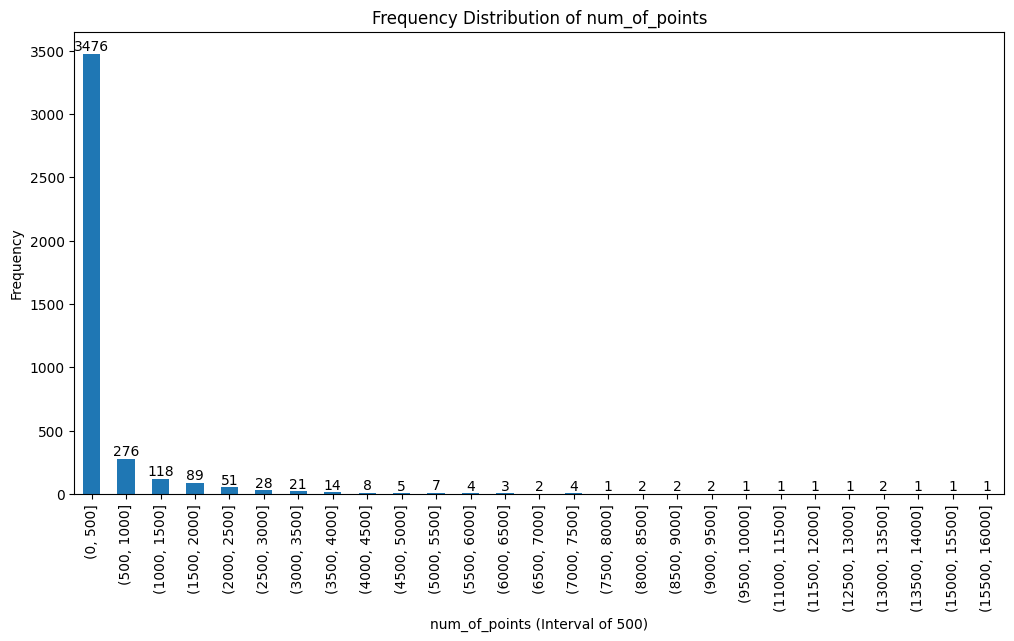

In [39]:
# 绘制频率分布图
plt.figure(figsize=(12, 6))
ax = count1.plot(kind='bar')

# 设置图表标题和轴标签
plt.title('Frequency Distribution of num_of_points')
plt.xlabel('num_of_points (Interval of 500)')
plt.ylabel('Frequency')

# # 将个数为1的区间的X轴标签设置为红色
# for i, v in enumerate(count1):
#     if v == 1:
#         plt.gca().get_xticklabels()[i].set_color('red')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


# 显示图表
plt.show()

In [40]:
import matplotlib.pyplot as plt
# 将num_of_points分成不同的区间，每个区间间隔为100
bins = pd.cut(df_over50['num_of_GPS_points'], bins=range(0, 1050, 50))
# 统计每个区间的频率
count = bins.value_counts().sort_index()
count

(0, 50]        1894
(50, 100]       546
(100, 150]      300
(150, 200]      228
(200, 250]      134
(250, 300]      119
(300, 350]       79
(350, 400]       74
(400, 450]       55
(450, 500]       47
(500, 550]       37
(550, 600]       38
(600, 650]       30
(650, 700]       29
(700, 750]       28
(750, 800]       32
(800, 850]       25
(850, 900]       22
(900, 950]       18
(950, 1000]      17
Name: num_of_GPS_points, dtype: int64

In [41]:
count1 = count[count != 0]
count1

(0, 50]        1894
(50, 100]       546
(100, 150]      300
(150, 200]      228
(200, 250]      134
(250, 300]      119
(300, 350]       79
(350, 400]       74
(400, 450]       55
(450, 500]       47
(500, 550]       37
(550, 600]       38
(600, 650]       30
(650, 700]       29
(700, 750]       28
(750, 800]       32
(800, 850]       25
(850, 900]       22
(900, 950]       18
(950, 1000]      17
Name: num_of_GPS_points, dtype: int64

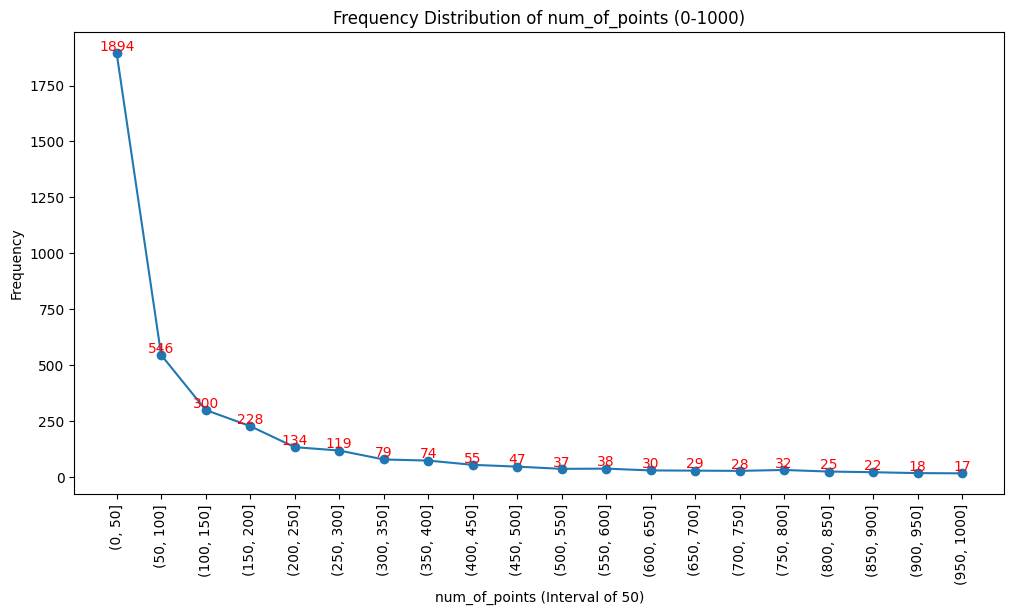

In [42]:
# 绘制频率分布图
plt.figure(figsize=(12, 6))

ax = count1.plot(kind='line', marker = 'o')

# 设置图表标题和轴标签
plt.title('Frequency Distribution of num_of_points (0-1000)')
plt.xlabel('num_of_points (Interval of 50)')
plt.ylabel('Frequency')

# # 将个数为1的区间的X轴标签设置为红色
# for i, v in enumerate(count1):
#     if v == 1:
#         plt.gca().get_xticklabels()[i].set_color('red')
for i, v in enumerate(count1):
    plt.annotate(str(v), xy=(i, v), xytext=(i, v + 10), ha='center', color='red')

plt.xticks(range(len(count1.index)), count1.index, rotation='vertical')

# 显示图表
plt.show()

In [63]:
id_list = sp['user_id'].unique()
sp_data = {'user_id': id_list, 'num_of_stay_poins': 0}
sp_data = pd.DataFrame(sp_data)
for id in id_list:
    count = len(sp[sp['user_id'] == id])
    sp_data.loc[sp_data['user_id'] == id, 'num_of_stay_poins'] = count
sp_data

user_id  num_of_stay_poins
0            0                  1
1            2                 46
2            3                  8
3            8                260
4           10                347
...        ...                ...
13964    34483                  9
13965    34484                  1
13966    34490                  3
13967    34492                  2
13968    34497                  1

[13969 rows x 2 columns]

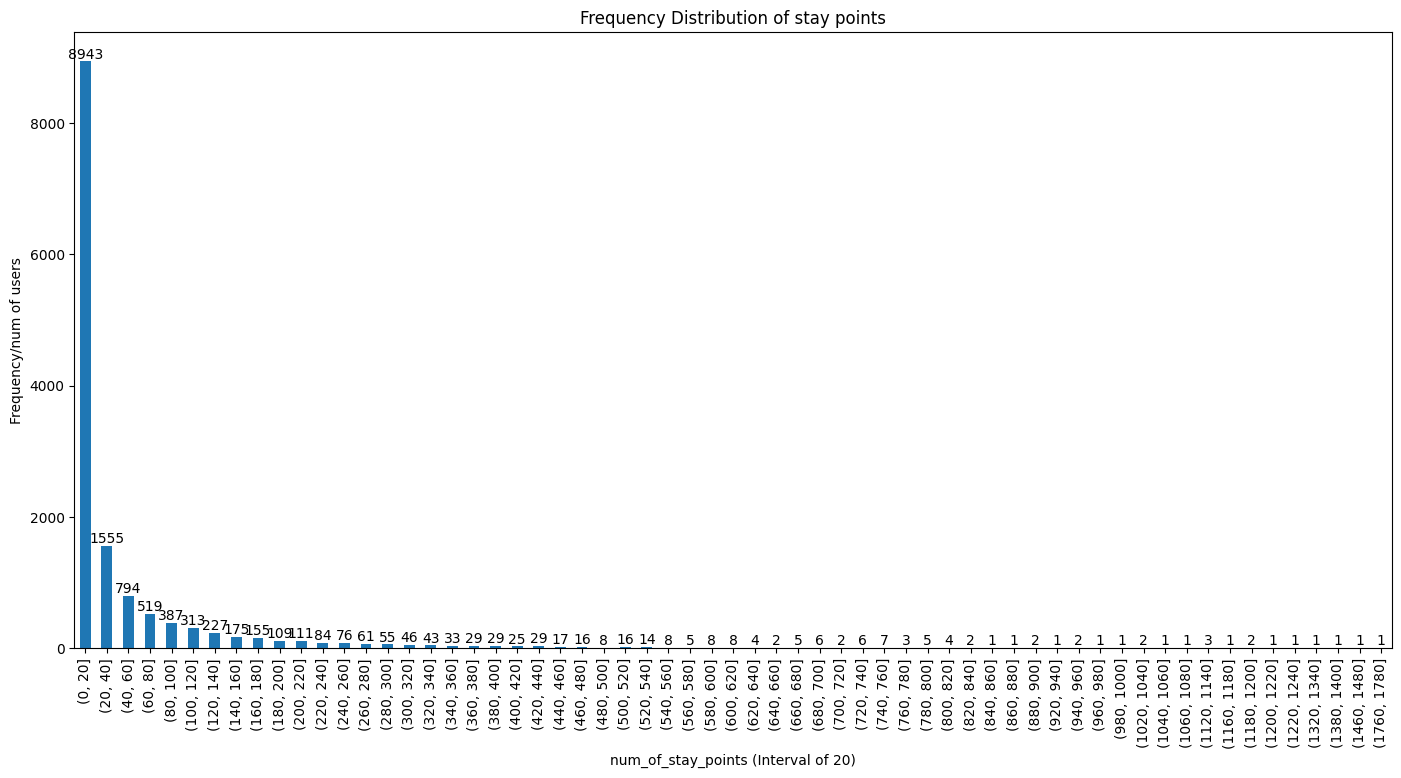

In [64]:
bins = pd.cut(sp_data['num_of_stay_poins'], bins=range(0, sp_data['num_of_stay_poins'].max() + 20, 20))
# 统计每个区间的频率
count = bins.value_counts().sort_index()
count1 = count[count != 0]

# 绘制频率分布图
plt.figure(figsize=(17, 8))
ax = count1.plot(kind='bar')

# 设置图表标题和轴标签
plt.title('Frequency Distribution of stay points')
plt.xlabel('num_of_stay_points (Interval of 20)')
plt.ylabel('Frequency/num of users')

# # 将个数为1的区间的X轴标签设置为红色
# for i, v in enumerate(count1):
#     if v == 1:
#         plt.gca().get_xticklabels()[i].set_color('red')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


# 显示图表
plt.show()

In [78]:
count = sp_data['num_of_stay_poins'].value_counts()
count1 = count[count.index <= 40]
count1 = count1.sort_index()
count1

1     1843
2     1200
3      847
4      716
5      598
6      512
7      437
8      421
9      321
10     291
11     255
12     234
13     211
14     172
15     188
16     154
17     159
18     135
19     132
20     117
21     103
22     120
23     107
24      95
25      97
26      95
27      79
28      71
29      77
30      77
31      74
32      67
33      63
34      79
35      64
36      57
37      62
38      62
39      54
40      52
Name: num_of_stay_poins, dtype: int64

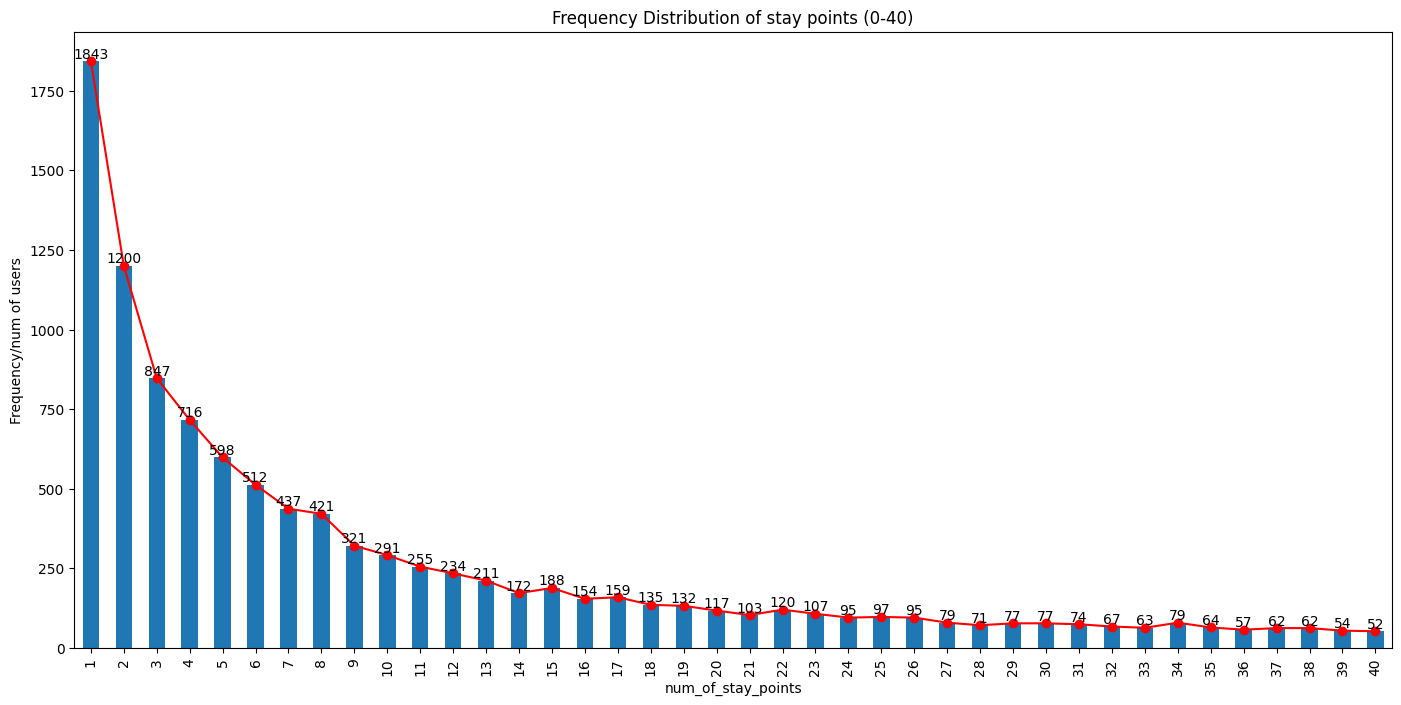

In [95]:
# 绘制频率分布图
plt.figure(figsize=(17, 8))
ax = count1.plot(kind='bar')

# 设置图表标题和轴标签
plt.title('Frequency Distribution of stay points (0-40)')
plt.xlabel('num_of_stay_points')
plt.ylabel('Frequency/num of users')
plt.plot(count1.index - 1, count1.values, marker='o', linestyle='-', color = 'red')
plt.xticks(range(len(count1.index)), count1.index)


# # 将个数为1的区间的X轴标签设置为红色
# for i, v in enumerate(count1):
#     if v == 1:
#         plt.gca().get_xticklabels()[i].set_color('red')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


# 显示图表
plt.show()